## Data Analysis pipeline for all datasets

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\krone.xlsx")
df.rename(columns={
    "News Outlet": "news_outlet",
    "Provenance": "provenance",
    "Query Keywords": "query_keywords",
    "Creation Date": "creation_date",
    "Crawl Date": "crawl_date",
    "Author Person": "author_person",
    "News Keywords": "news_keywords",
    "Title": "content_title",
    "Description": "content_description",
    "Body": "content_body",
    "Fake News": "Fake News",
    "Extreme bias": "Extreme bias",
    "clickbait": "clickbait",
    "credible": "credible"
}, inplace=True)
df["author_organization"] = np.nan
df

,news_outlet,provenance,query_keywords,creation_date,crawl_date,author_person,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,author_organization
0,krone,https://www.krone.at/3450771,"sp, us, ss, ns",10.07.2024,22.10.2024,NaN,NaN,Gehälter: Ab wann Sie zum reichsten Viertel zä...,Die neuesten Zahlen der Personal- und Manageme...,Die neuesten Zahlen der Personal- und Managem...,0.0,0.0,0.0,1.0,NaN
1,krone,https://www.krone.at/3553567,"us, sp, spo, ns, ss",09.10.2024,22.10.2024,NaN,NaN,Philipp bewegt jetzt auch Österreichs Schulen!,Die tägliche Bewegungseinheit auf krone.tv mit...,Die tägliche Bewegungseinheit auf krone.tv mi...,0.0,0.0,0.0,1.0,NaN
2,krone,https://www.krone.at/3535044,"us, hamas, sp, rna, ns, israel, terror, ss",23.09.2024,22.10.2024,NaN,NaN,Luftangriff erfolgreich? Rätselraten um Hamas-...,Der Drahtzieher des Anschlags vom 7. Oktober a...,Der Drahtzieher des Anschlags vom 7. Oktober ...,0.0,0.0,1.0,0.0,NaN
3,krone,https://www.krone.at/3561198,"europa, us, sp, spo, leiche, ns, ss",17.10.2024,22.10.2024,NaN,NaN,„Ich vergleiche die ACSL mit der Champions Lea...,Startschuss für die neue Saison der ACSL (Aust...,Startschuss für die neue Saison der ACSL (Aus...,NaN,NaN,NaN,NaN,NaN
4,krone,https://www.krone.at/2334016,"europa, us, sp, corona, ns, ss",03.02.2021,22.10.2024,NaN,NaN,"Freitesten bleibt, Testpflicht für Pendler",Pendler müssen sich künftig registrieren und e...,Pendler müssen sich künftig registrieren und ...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,krone,https://www.krone.at/2426265,"us, sp, spo, ukraine, usa, ns, amerika, politi...",30.05.2021,22.10.2024,NaN,NaN,Biden will mit Putin Klartext reden,US-Präsident Joe Biden und sein russischer Amt...,US-Präsident Joe Biden und sein russischer Am...,NaN,NaN,NaN,NaN,NaN
1012,krone,https://www.krone.at/2337635,"us, sp, corona, ns, afrika, ss",08.02.2021,22.10.2024,NaN,NaN,Südafrika-Mutation: Verdachtsfall in Pflegeheim,Nun könnte die Südafrika-Mutation des Coronavi...,Nun könnte die Südafrika-Mutation des Coronav...,NaN,NaN,NaN,NaN,NaN
1013,krone,https://www.krone.at/2212905,"schi, us, sp, lockdown, rna, corona, ns, usa, ss",18.08.2020,22.10.2024,NaN,NaN,Ex-Stadtchef Schaden kocht jetzt im Internet auf,"Keine Idee, was Sie heute kochen sollen? Ein B...","Keine Idee, was Sie heute kochen sollen? Ein ...",NaN,NaN,NaN,NaN,NaN
1014,krone,https://www.krone.at/2337129,"us, mrna, sp, impfstoff, rna, ns, afrika, ss",07.02.2021,22.10.2024,NaN,NaN,Südafrika stoppt Einsatz von AstraZeneca-Impfs...,Südafrika wird den Einsatz des Impfstoffes des...,Südafrika wird den Einsatz des Impfstoffes de...,NaN,NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [9]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News        5.0
Extreme bias     5.0
clickbait        8.0
credible        27.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   news_outlet          1016 non-null   object 
 1   provenance           1016 non-null   object 
 2   query_keywords       1016 non-null   object 
 3   creation_date        1016 non-null   object 
 4   crawl_date           1016 non-null   object 
 5   author_person        0 non-null      float64
 6   news_keywords        0 non-null      float64
 7   content_title        1016 non-null   object 
 8   content_description  1003 non-null   object 
 9   content_body         1016 non-null   object 
 10  Fake News            33 non-null     float64
 11  Extreme bias         33 non-null     float64
 12  clickbait            33 non-null     float64
 13  credible             33 non-null     float64
 14  author_organization  0 non-null      float64
dtypes: float64(7), object(8)
memory usage:

plot of label distr

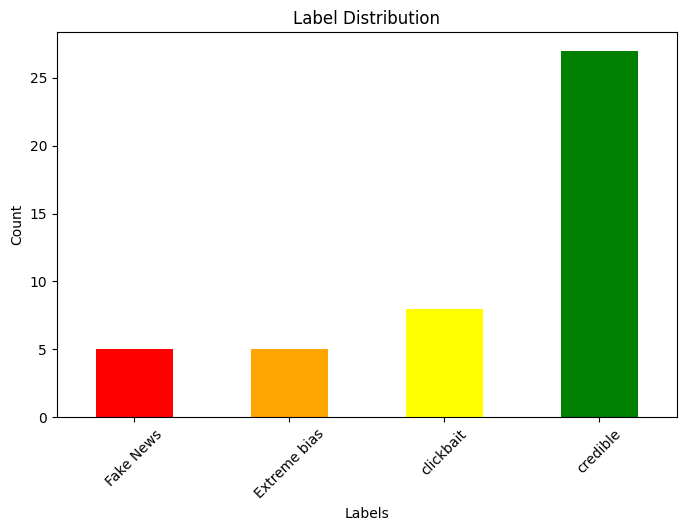

In [11]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

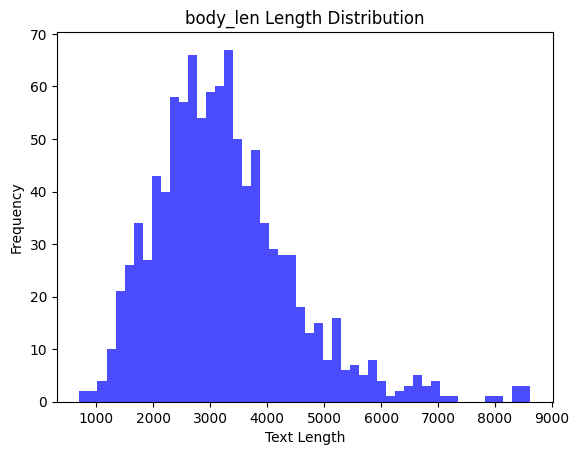

In [12]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

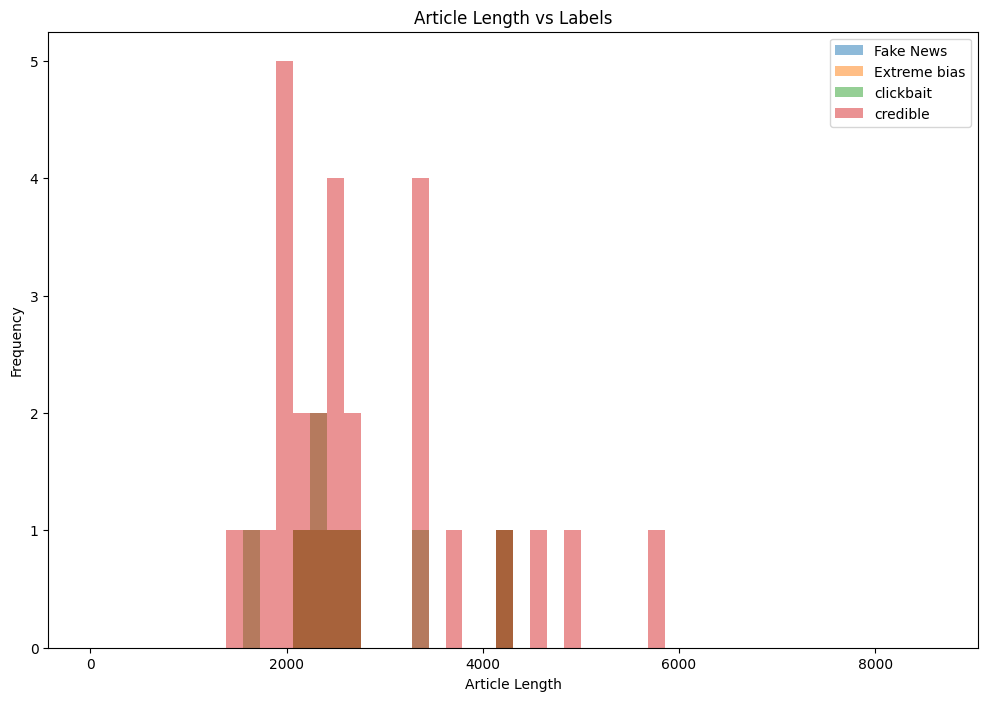

In [13]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize bodies

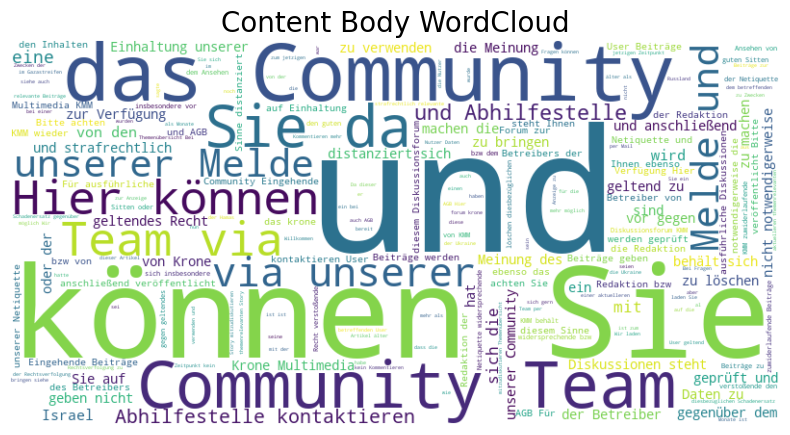

In [14]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize title

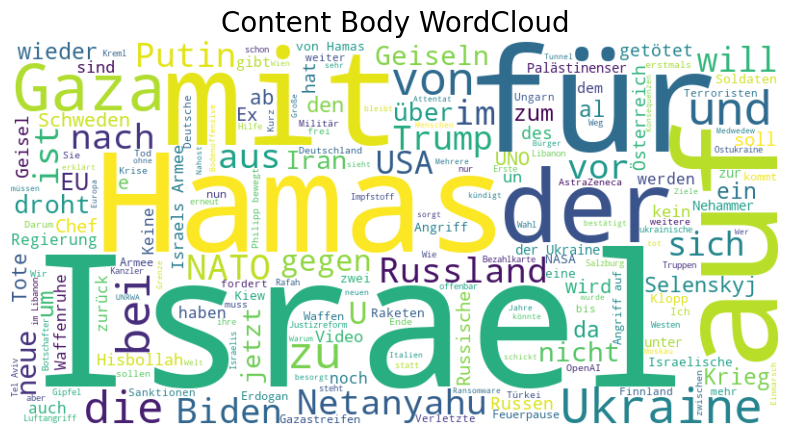

In [ ]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Title WordCloud')

split df to labelled and not labelled

In [16]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 33 rows
Unlabelled Data: 983 rows


In [17]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,crawl_date,author_person,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,author_organization,body_len,has_label
0,krone,https://www.krone.at/3450771,"sp, us, ss, ns",10.07.2024,22.10.2024,NaN,NaN,Gehälter: Ab wann Sie zum reichsten Viertel zä...,Die neuesten Zahlen der Personal- und Manageme...,Die neuesten Zahlen der Personal- und Managem...,0.0,0.0,0.0,1.0,NaN,2056,True
1,krone,https://www.krone.at/3553567,"us, sp, spo, ns, ss",09.10.2024,22.10.2024,NaN,NaN,Philipp bewegt jetzt auch Österreichs Schulen!,Die tägliche Bewegungseinheit auf krone.tv mit...,Die tägliche Bewegungseinheit auf krone.tv mi...,0.0,0.0,0.0,1.0,NaN,2031,True
2,krone,https://www.krone.at/3535044,"us, hamas, sp, rna, ns, israel, terror, ss",23.09.2024,22.10.2024,NaN,NaN,Luftangriff erfolgreich? Rätselraten um Hamas-...,Der Drahtzieher des Anschlags vom 7. Oktober a...,Der Drahtzieher des Anschlags vom 7. Oktober ...,0.0,0.0,1.0,0.0,NaN,3317,True
6,krone,https://www.krone.at/2325951,"demo, schi, us, regierung, sp, rna, spo, ns, u...",24.01.2021,22.10.2024,NaN,NaN,Russland: Über 3400 Festnahmen bei Mega-Protesten,In Moskau und zahlreichen weiteren russischen ...,In Moskau und zahlreichen weiteren russischen...,0.0,0.0,0.0,1.0,NaN,2489,True
7,krone,https://www.krone.at/2324593,"demo, us, sp, corona, ns, pandemie, ss",22.01.2021,22.10.2024,NaN,NaN,Nawalny-Sprecherin kurz vor Protesten inhaftiert,Kurz nach der umstrittenen Inhaftierung des Kr...,Kurz nach der umstrittenen Inhaftierung des K...,0.0,0.0,0.0,1.0,NaN,2227,True


encode labels

In [18]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_47996\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [19]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,crawl_date,author_person,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,author_organization,body_len,has_label,label
0,krone,https://www.krone.at/3450771,"sp, us, ss, ns",10.07.2024,22.10.2024,NaN,NaN,Gehälter: Ab wann Sie zum reichsten Viertel zä...,Die neuesten Zahlen der Personal- und Manageme...,Die neuesten Zahlen der Personal- und Managem...,0.0,0.0,0.0,1.0,NaN,2056,True,"[0, 0, 0, 1]"
1,krone,https://www.krone.at/3553567,"us, sp, spo, ns, ss",09.10.2024,22.10.2024,NaN,NaN,Philipp bewegt jetzt auch Österreichs Schulen!,Die tägliche Bewegungseinheit auf krone.tv mit...,Die tägliche Bewegungseinheit auf krone.tv mi...,0.0,0.0,0.0,1.0,NaN,2031,True,"[0, 0, 0, 1]"
2,krone,https://www.krone.at/3535044,"us, hamas, sp, rna, ns, israel, terror, ss",23.09.2024,22.10.2024,NaN,NaN,Luftangriff erfolgreich? Rätselraten um Hamas-...,Der Drahtzieher des Anschlags vom 7. Oktober a...,Der Drahtzieher des Anschlags vom 7. Oktober ...,0.0,0.0,1.0,0.0,NaN,3317,True,"[0, 0, 1, 0]"
6,krone,https://www.krone.at/2325951,"demo, schi, us, regierung, sp, rna, spo, ns, u...",24.01.2021,22.10.2024,NaN,NaN,Russland: Über 3400 Festnahmen bei Mega-Protesten,In Moskau und zahlreichen weiteren russischen ...,In Moskau und zahlreichen weiteren russischen...,0.0,0.0,0.0,1.0,NaN,2489,True,"[0, 0, 0, 1]"
7,krone,https://www.krone.at/2324593,"demo, us, sp, corona, ns, pandemie, ss",22.01.2021,22.10.2024,NaN,NaN,Nawalny-Sprecherin kurz vor Protesten inhaftiert,Kurz nach der umstrittenen Inhaftierung des Kr...,Kurz nach der umstrittenen Inhaftierung des K...,0.0,0.0,0.0,1.0,NaN,2227,True,"[0, 0, 0, 1]"


we can drop, whatever we dont need, later

export data

In [20]:
labelled_df.to_csv('krone_labelled_data.csv', index=False)
unlabelled_df.to_csv('krone_unlabelled_data.csv', index=False)